<h1> AI - Project</h1>
<h1> predict cardiovascular-diseases</h1>

<h2> Getting the data </h2>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd 

from matplotlib import pyplot as plt
import seaborn as sns



C:\Users\Hamza\AppData\Roaming\Python\Python311\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
#Reading the DataSet
cardio = pd.read_excel(r"H:\university\ai\AI-Project (1)\cardio.xlsx")


In [3]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           70000 non-null  int64
 1   age          70000 non-null  int64
 2   gender       70000 non-null  int64
 3   height       70000 non-null  int64
 4   weight       70000 non-null  int64
 5   ap_hi        70000 non-null  int64
 6   ap_lo        70000 non-null  int64
 7   cholesterol  70000 non-null  int64
 8   gluc         70000 non-null  int64
 9   smoke        70000 non-null  int64
 10  alco         70000 non-null  int64
 11  active       70000 non-null  int64
 12  cardio       70000 non-null  int64
dtypes: int64(13)
memory usage: 6.9 MB


<h2> Exploring the data </h2>

In [4]:
#Exploring the Data
print(cardio.head())

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168      62    110     80            1     1      0   
1   1  20228       1     156      85    140     90            3     1      0   
2   2  18857       1     165      64    130     70            3     1      0   
3   3  17623       2     169      82    150    100            1     1      0   
4   4  17474       1     156      56    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [5]:
print(cardio.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           70000 non-null  int64
 1   age          70000 non-null  int64
 2   gender       70000 non-null  int64
 3   height       70000 non-null  int64
 4   weight       70000 non-null  int64
 5   ap_hi        70000 non-null  int64
 6   ap_lo        70000 non-null  int64
 7   cholesterol  70000 non-null  int64
 8   gluc         70000 non-null  int64
 9   smoke        70000 non-null  int64
 10  alco         70000 non-null  int64
 11  active       70000 non-null  int64
 12  cardio       70000 non-null  int64
dtypes: int64(13)
memory usage: 6.9 MB
None


In [6]:
print(cardio.describe())

                 id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205543   
std    28851.302323   2467.251667      0.476838      8.210126     14.395829   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250    

<h1></h1>
<h2> Data Preparation </h2>

In [7]:
#Making sure that there aren't null values:
print(cardio.isnull().sum())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [8]:
#Printing the percentage of the 2 classes:
print(cardio['cardio'].value_counts(normalize=True))

cardio
0    0.5003
1    0.4997
Name: proportion, dtype: float64


In [9]:
#adding new feature (BMI) to our data
cardio['BMI'] = cardio['weight']/((cardio['height']/100)**2)

In [10]:
print((cardio['BMI']<18.5).value_counts())
print(((cardio['BMI']>=18.5) & (cardio['BMI']<25)).value_counts())
print(((cardio['BMI']>=25) & (cardio['BMI']<30)).value_counts())
print((cardio['BMI']>=30).value_counts())

BMI
False    69349
True       651
Name: count, dtype: int64
BMI
False    44212
True     25788
Name: count, dtype: int64
BMI
False    44913
True     25087
Name: count, dtype: int64
BMI
False    51526
True     18474
Name: count, dtype: int64


In [11]:
cardio.loc[cardio["BMI"] < 18.5, "BMI"] = 0
cardio.loc[(cardio["BMI"] >= 18.5) & (cardio["BMI"] < 25), "BMI"] = 1
cardio.loc[(cardio["BMI"] >= 25) & (cardio["BMI"] < 30), "BMI"] = 2
cardio.loc[cardio["BMI"] >= 30, "BMI"] = 3
cardio['BMI'] = cardio['BMI'].astype('int')
print((cardio['BMI']==0).value_counts())
print((cardio['BMI']==1).value_counts())
print((cardio['BMI']==2).value_counts())
print((cardio['BMI']==3).value_counts())


BMI
False    69349
True       651
Name: count, dtype: int64
BMI
False    44212
True     25788
Name: count, dtype: int64
BMI
False    44913
True     25087
Name: count, dtype: int64
BMI
False    51526
True     18474
Name: count, dtype: int64


In [12]:
#Lets see the correlation between the features:
corr_matrix = cardio.corr()

In [13]:
corr_matrix["cardio"].sort_values(ascending=False)

cardio         1.000000
age            0.238159
cholesterol    0.221147
BMI            0.185163
weight         0.181656
gluc           0.089307
ap_lo          0.065719
ap_hi          0.054475
gender         0.008109
id             0.003799
alco          -0.007330
height        -0.010821
smoke         -0.015486
active        -0.035653
Name: cardio, dtype: float64

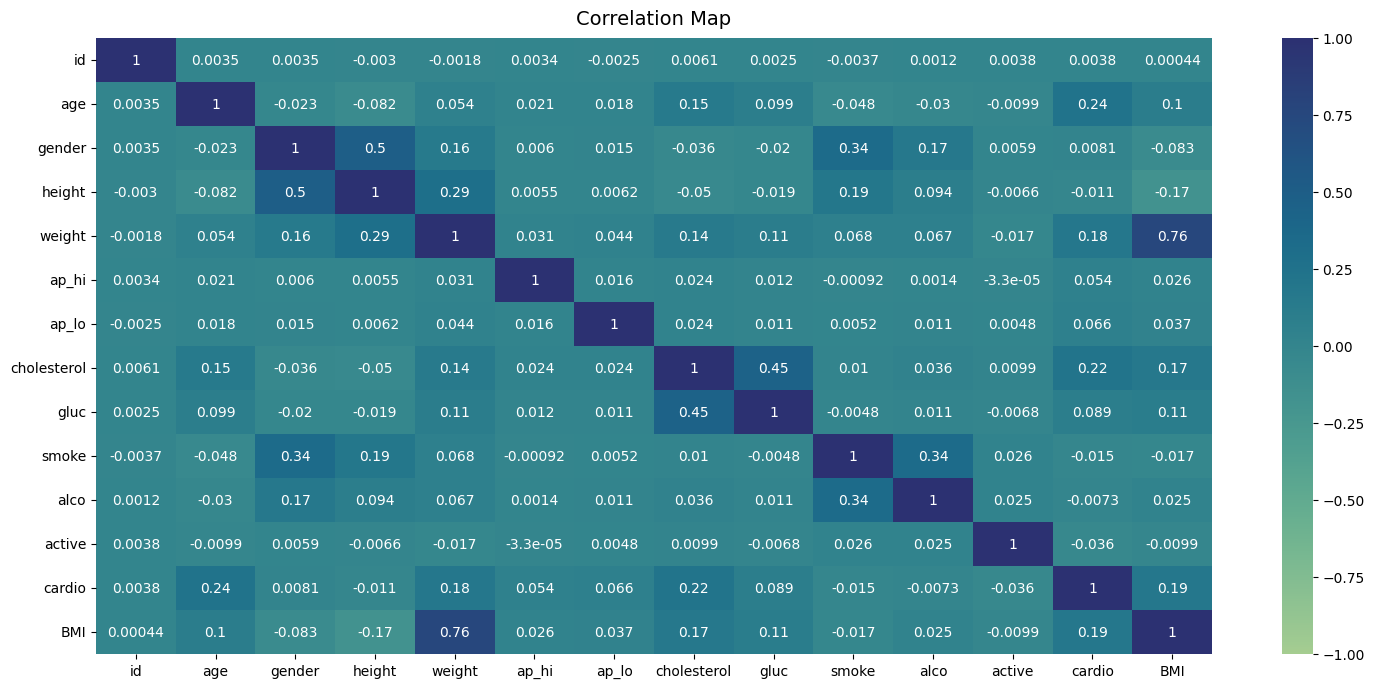

In [14]:
# Lets draw the Correlation matrix to understand relation between variables

plt.figure(figsize=(18, 8))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='crest') 
plt.title('Correlation Map', fontdict={'fontsize':14}, pad=10);

In [15]:
#As we can see above, we have the ID Feature that has nearly 0 correlation to the target, 
#so it may affect badly on the model's accuracy, so Lets Drop it:
cardio.drop("id", axis='columns', inplace = True)

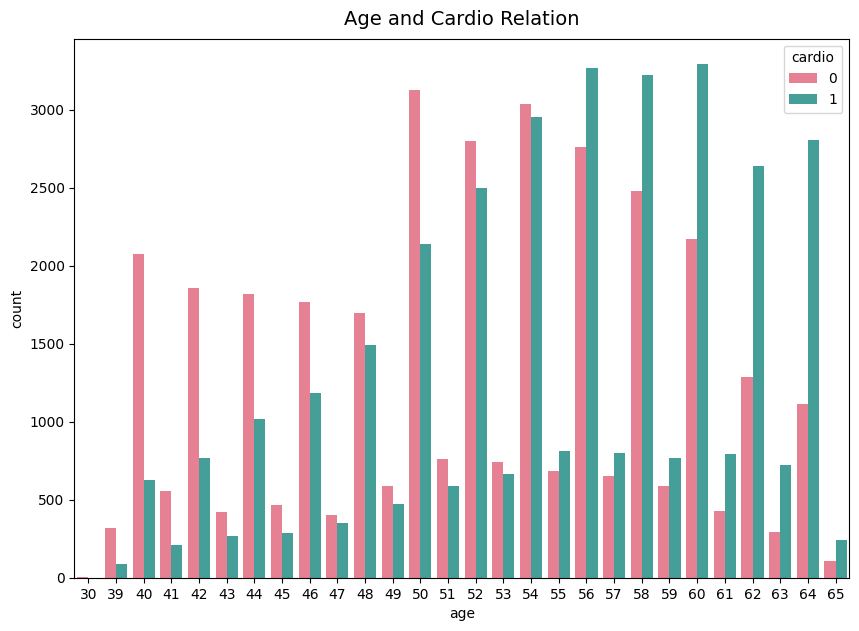

In [16]:
#As we see from the corrilation between the features, the most correlated feature to the target is the age,
#So let's draw a figure to see the connection between the age and the target:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 7
#Converting the age from days to years:
cardio['age'] = (cardio['age'] / 365).round().astype('int')
sns.countplot(x='age', hue='cardio', data = cardio, palette=("husl"));
plt.title('Age and Cardio Relation', fontdict={'fontsize':14}, pad=10);

<h5 style="color:blue;"> As we see in the graph above, after the age of 55 years, the chance of 
cardio-diseases increases, and the count of being exposed to cardio-diseases is higher than being healthy.</h5>

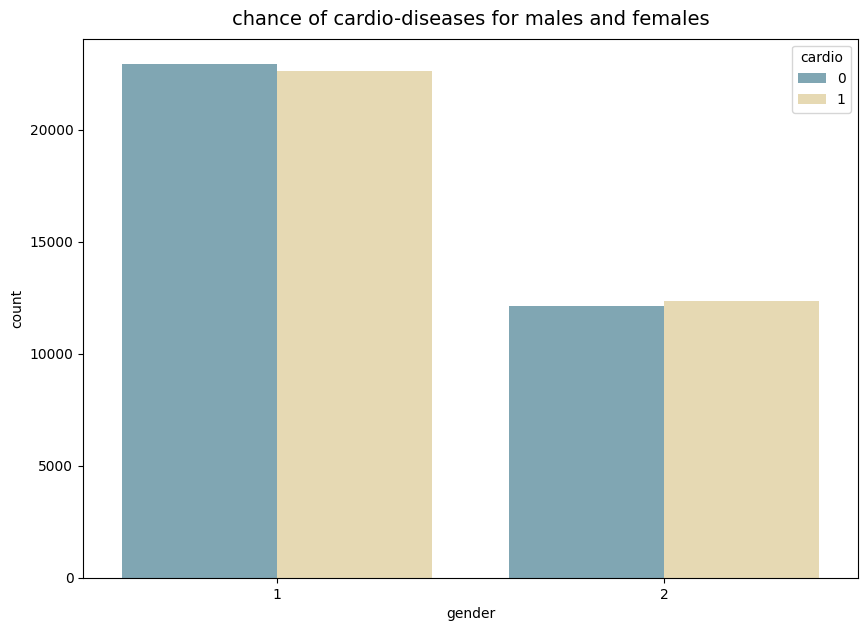

In [17]:
#Let's plot the diffrence between females and males of being exposed to cardio:
sns.countplot(x='gender', data=cardio, hue='cardio', palette=("blend:#7AB,#EDA"))
plt.title('chance of cardio-diseases for males and females', fontdict={'fontsize':14}, pad=10);
plt.show()

<h5 style="color:blue;">
As we see above, Not much of a difference between females (1) and males (2) in the chance
of getting cardio-disease.
</h5>

In [18]:
#Let's see if there are duplicated rows
cardio.duplicated().sum()

3820

In [19]:
#As we see, we have 24 rows are being duplicated many times by other records, let's take a look at them:
duplicated = cardio[cardio.duplicated(keep=False)]
duplicated = duplicated.sort_values(by=['gender', 'BMI'], ascending= False)
print(duplicated)

       age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
798     64       2     173      90    120     80            1     1      0   
1405    48       2     167      84    120     80            1     1      0   
4435    48       2     175      98    120     80            1     1      0   
4800    58       2     174     105    120     90            1     1      0   
4898    64       2     170      90    140     90            1     1      0   
...    ...     ...     ...     ...    ...    ...          ...   ...    ...   
69922   42       1     165      62    100     60            1     1      0   
69951   42       1     158      55    110     70            1     1      0   
69988   60       1     160      59    110     70            1     1      0   
51036   48       1     162      48    120     80            1     1      0   
69733   48       1     162      48    120     80            1     1      0   

       alco  active  cardio  BMI  
798       0       1       1 

In [20]:
#Let's drop the duplicated rows and we'll keep the first appearence of them only:
cardio.drop_duplicates(keep = 'first', inplace = True)
cardio.duplicated().sum()

0

In [21]:
import tensorflow as tf
assert tf.__version__ >= "2.0"

import tensorflow as tf
from tensorflow import keras

from keras.layers import Dense   # Dense layers for the neural network
from keras.layers import Dropout

from keras.models import Sequential

<h3>Split the data</h3>

In [22]:
from sklearn.model_selection import train_test_split

#Splitting the data into train and test sets:
trainFull_set, test_set = train_test_split(cardio, test_size=0.15, random_state=42)

#Splitting the data into features and lables for train_set:
X_train_full = trainFull_set.drop("cardio", axis='columns')
y_train_full  = trainFull_set["cardio"].copy()

#Splitting the train set into train and validation sets:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

#Splitting the data into features and lables for test_set:
X_test = test_set.drop("cardio", axis='columns')
y_test = test_set["cardio"].copy()





<h2> Scaling</h2>

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [24]:
X_train.shape

(51253, 12)

In [25]:
#Making sure that the labels have the same weight on all labels lists
print(y_train.value_counts(normalize=True))
print(y_valid.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

cardio
1    0.513746
0    0.486254
Name: proportion, dtype: float64
cardio
1    0.5132
0    0.4868
Name: proportion, dtype: float64
cardio
1    0.513247
0    0.486753
Name: proportion, dtype: float64


In [26]:
#Since most of the papers uses classical techniques, let's try them and then build Nueral Network model 
#And compare them to find the best model to use.


<h1>Training Models </h1>

<h3 style="color:green;" >1. Classical-Techniques</h3>

In [27]:
#Let's use the ensemble Learning to vote out of 3 classifiers:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.ensemble import VotingClassifier

svc_clf = SVC(C=100, gamma=0.00001, kernel="rbf", random_state=42)

random_clf = RandomForestClassifier(n_estimators=100,
                          max_depth=10,
                          random_state=0)

xgbc_clf = XGBClassifier(n_estimators=150)

voting_clf = VotingClassifier(
    estimators=[('xgbc', xgbc_clf), ('rf', random_clf), ('svc', svc_clf)],
    voting='hard')

In [28]:
voting_clf.fit(X_train_full, y_train_full)

VotingClassifier(estimators=[('xgbc',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_r...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=150, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('rf',
                              RandomForestClassifier(max_depth=10,
                                                     random_state=0)),
                             ('svc', SVC(C=100, gamma=1e-05, random_state=42))])

In [29]:
#Let's print the accuracy of the voting classifier
from sklearn.metrics import accuracy_score
y_pred = voting_clf.predict(X_test)
score_classical = accuracy_score(y_test, y_pred)
score_classical
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

<h4 style="color:blue;">We see that the accuracy is 73%, which is almost the maximum accuracy 
we've found on the papers made on this dataset.</h4>
<h1></h1>

In [352]:
#Let's see the confusion matrix
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, y_pred)
conf

array([[3620, 1212],
       [1476, 3619]], dtype=int64)

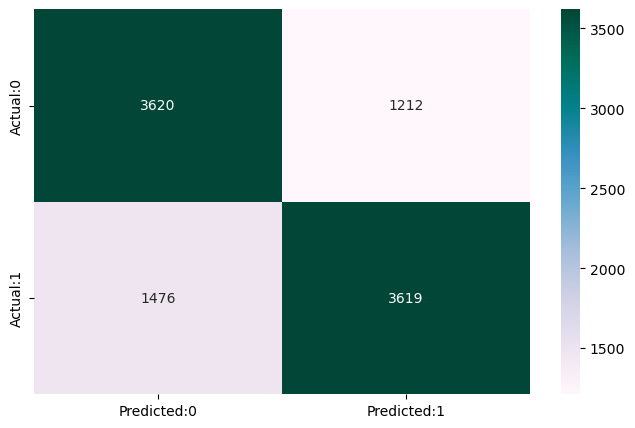

In [353]:
#Let's draw the confusion matrix:
conf_matrix=pd.DataFrame(data=conf,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="PuBuGn");

In [355]:
precision_score(y_test, y_pred)

0.7491202649554958

In [356]:
#Let's see the recall:
recall_classical = recall_score(y_test, y_pred)
recall_classical

0.7103042198233562

<h4 style="color:blue;">
Bad recall, we'll try to fix it once we find the best model, (the Neural network model)
</h4>
<h1></h1>

<h3 style="color:green;" >2. Neural Network</h3>

In [98]:
#Now, Let's use Neural Network:
model = keras.models.Sequential()
#Let's use the selu activation function
model.add(keras.layers.Dense(10, activation="selu", kernel_initializer = 'lecun_normal', input_shape=(12,)))
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [99]:
model.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_116 (Dense)           (None, 10)                130       
                                                                 
 dense_117 (Dense)           (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [100]:
from sklearn import metrics   # Allows us to view accuracy and other such values
from keras import optimizers
#Let's try SGD optimizer1
opt = optimizers.SGD(learning_rate=0.001)
model.compile(loss="binary_crossentropy",
              optimizer=opt,
              metrics=['accuracy'])

In [113]:
#Let's save the model:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model_B.h5", save_best_only=True)

#Let's use the Early stopping callback to stop at the best weights:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=7,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=60,
                    validation_data=(X_valid, y_valid), batch_size=15, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/60
3417/3417 [==============================] - 3s 832us/step - loss: 0.5664 - accuracy: 0.7246 - val_loss: 0.5639 - val_accuracy: 0.7188
Epoch 2/60
3417/3417 [==============================] - 3s 805us/step - loss: 0.5662 - accuracy: 0.7243 - val_loss: 0.5641 - val_accuracy: 0.7204
Epoch 3/60
3417/3417 [==============================] - 3s 867us/step - loss: 0.5662 - accuracy: 0.7248 - val_loss: 0.5638 - val_accuracy: 0.7206
Epoch 4/60
3417/3417 [==============================] - 3s 862us/step - loss: 0.5661 - accuracy: 0.7242 - val_loss: 0.5640 - val_accuracy: 0.7184
Epoch 5/60
3417/3417 [==============================] - 3s 829us/step - loss: 0.5660 - accuracy: 0.7243 - val_loss: 0.5637 - val_accuracy: 0.7196
Epoch 6/60
3417/3417 [==============================] - 3s 853us/step - loss: 0.5659 - accuracy: 0.7246 - val_loss: 0.5634 - val_accuracy: 0.7196
Epoch 7/60
3417/3417 [==============================] - 3s 836us/step - loss: 0.5657 - accuracy: 0.7246 - val_loss: 0.5640 -

In [114]:
#Let's see the accuracy on the test set:
model.evaluate(X_test, y_test)

311/311 [==============================] - 0s 683us/step - loss: 0.5629 - accuracy: 0.7223


[0.5629187226295471, 0.7222725749015808]

<h5 style="color:blue;">The accuracy is 72.2%</h5>
<h5 style="color:blue;">Let's fine-tuen our model:</h5>

<h1></h1>
<h2> Fine-tuning the model </h2>

In [318]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from keras import optimizers

def create_model(neurons):
 # create model
 model = Sequential()
 #Let's try the selu activation function
 model.add(Dense(neurons, input_shape=(12,), kernel_initializer='lecun_normal', activation='selu'))
 model.add(Dense(neurons, kernel_initializer='lecun_normal', activation='selu'))
 model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
 # Compile model
 #Let's try the momentum with the SGD
 model.compile(loss='binary_crossentropy', optimizer=optimizers.SGD(learning_rate=0.001, momentum=0.85), metrics=['accuracy'])
 return model

model_tuned = KerasClassifier(model=create_model, epochs=60, batch_size=10, verbose=0)
# define the grid search parameters
neurons = [10, 20, 30, 40]
param_grid = dict(model__neurons=neurons)
grid = GridSearchCV(estimator=model_tuned, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
 


Best: 0.726962 using {'model__neurons': 30}


In [319]:
model_neurons = grid.best_estimator_

In [321]:
#Let's test the best model on the test set:
model_neurons.score(X_test, y_test)

0.7162284678150499

In [333]:
#Accuracy on train set is 72%, let's use the early stopping on a new model that has the same network 
#as the best output of the grid swarch:
model3 = Sequential()
#For the first layer, use the same neurons as the best models
model3.add(Dense(30, input_shape=(12,), kernel_initializer='lecun_normal', activation='selu'))

model3.add(Dense(30, kernel_initializer='lecun_normal', activation='selu'))

model3.add(Dense(1, activation='sigmoid'))
# Compile model
model3.compile(loss='binary_crossentropy', 
               optimizer=optimizers.SGD(learning_rate=0.001, momentum=0.85), metrics=['accuracy'])

In [334]:
#Let's save the model:
checkpoint_model3 = keras.callbacks.ModelCheckpoint("my_keras_model_C.h5", save_best_only=True)

#Let's use the Early stopping callback to stop at the best weights:
early_stopping_model3 = keras.callbacks.EarlyStopping(patience=8,
                                                  restore_best_weights=True)
history = model3.fit(X_train, y_train, epochs=70,
                    validation_data=(X_valid, y_valid), batch_size=15, 
                    callbacks=[checkpoint_model3, early_stopping_model3])

Epoch 1/70
3417/3417 [==============================] - 4s 972us/step - loss: 0.6230 - accuracy: 0.6567 - val_loss: 0.5964 - val_accuracy: 0.6840
Epoch 2/70
3417/3417 [==============================] - 3s 914us/step - loss: 0.5898 - accuracy: 0.6975 - val_loss: 0.5756 - val_accuracy: 0.7102
Epoch 3/70
3417/3417 [==============================] - 3s 996us/step - loss: 0.5778 - accuracy: 0.7105 - val_loss: 0.5720 - val_accuracy: 0.7116
Epoch 4/70
3417/3417 [==============================] - 3s 954us/step - loss: 0.5720 - accuracy: 0.7161 - val_loss: 0.5668 - val_accuracy: 0.7146
Epoch 5/70
3417/3417 [==============================] - 3s 1ms/step - loss: 0.5691 - accuracy: 0.7192 - val_loss: 0.5667 - val_accuracy: 0.7146
Epoch 6/70
3417/3417 [==============================] - 3s 1ms/step - loss: 0.5675 - accuracy: 0.7202 - val_loss: 0.5646 - val_accuracy: 0.7170
Epoch 7/70
3417/3417 [==============================] - 3s 983us/step - loss: 0.5670 - accuracy: 0.7209 - val_loss: 0.5652 - val

In [335]:
score_model3 = model3.evaluate(X_test, y_test)
print(score_model3)

311/311 [==============================] - 0s 709us/step - loss: 0.5525 - accuracy: 0.7299
[0.5525302290916443, 0.7299284934997559]


<h5 style="color:blue;"> The accuracy is better than before</h5>
<h5 style="color:blue;"> so, using the Neural Networks models gave us the same accuracy as the classical techniques, 
which is almost 73%, and it's equivilant to what the papers have reached using either 
the classical techniques or the nueral networks.</h5>
<h6 style="color:blue;"> refer to this for ex: https://www.kaggle.com/code/vbmokin/20-models-for-cardiovascular-disease-prediction </h6>

In [336]:
#Let's see the Confusion Matrix:

from sklearn.metrics import confusion_matrix

#Predict
y_prediction = model3.predict(X_train)
y_prediction = (y_prediction > 0.5)
y_prediction.astype(int)
cm = confusion_matrix(y_train, y_prediction)
cm

1602/1602 [==============================] - 1s 826us/step


array([[18920,  6002],
       [ 7679, 18652]], dtype=int64)

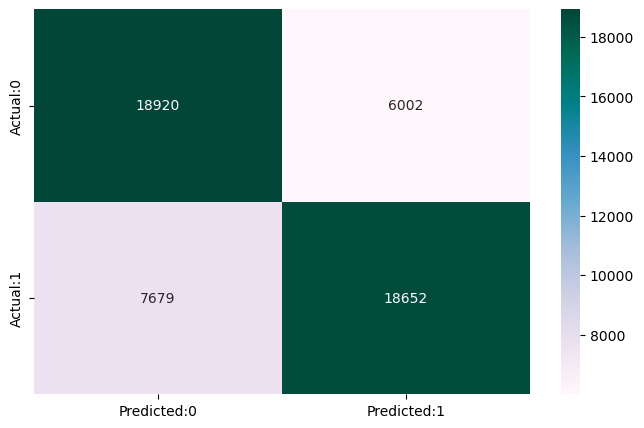

In [337]:
#Let's draw the confusion matrix:
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="PuBuGn");

In [338]:
#Let's see the precision:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_prediction)

0.7565506611503204

In [339]:
#Let's see the recall:

recall_for_model3= recall_score(y_train, y_prediction)
recall_for_model3

0.7083665641259352

<h5 style="color:blue;">
We see that the recall is 70%, which is low compared to the precision and the accuracy,
but in the medical field, the recall is much important, as we want to kill the false negatives 
to fix the disease ASAP, on the other hand, false positive may have some tolerance.

</h5>

<h1></h1>

<h5 style="color:blue;">
As we are concerned in the recall, 
Let's build a new model and give it the same network as model3(best model so far) 
and use [tf.keras.metrics.Recall()] as a metric instead of accuracy:
</h5>

In [340]:


model_final = Sequential()
#For the first layer, use the same neurons as the best models
model_final.add(Dense(30, input_shape=(12,), kernel_initializer='lecun_normal', activation='selu'))

model_final.add(Dense(30, kernel_initializer='lecun_normal', activation='selu'))

model_final.add(Dense(1, activation='sigmoid'))
# Compile model, using the recall metric
#As the default value of threshold is 0.5, let's try 0.3 to give us better recall, even if the precision will decrease:
model_final.compile(loss='binary_crossentropy', 
               optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.85),
               metrics=[tf.keras.metrics.Recall(thresholds=0.3)])

In [341]:

#Let's save the model:
checkpoint_model_final = keras.callbacks.ModelCheckpoint("my_keras_model_final.h5", save_best_only=True)

#Let's use the Early stopping callback to stop at the best weights:
early_stopping_model_final = keras.callbacks.EarlyStopping(patience=8,
                                                  restore_best_weights=True)
history = model_final.fit(X_train, y_train, epochs=70,
                    validation_data=(X_valid, y_valid), batch_size=15, 
                    callbacks=[checkpoint_model_final, early_stopping_model_final])

Epoch 1/70
3417/3417 [==============================] - 4s 1ms/step - loss: 0.5964 - recall_3: 0.9144 - val_loss: 0.5718 - val_recall_3: 0.9221
Epoch 2/70
3417/3417 [==============================] - 4s 1ms/step - loss: 0.5728 - recall_3: 0.9092 - val_loss: 0.5645 - val_recall_3: 0.8909
Epoch 3/70
3417/3417 [==============================] - 4s 1ms/step - loss: 0.5686 - recall_3: 0.9081 - val_loss: 0.5666 - val_recall_3: 0.8959
Epoch 4/70
3417/3417 [==============================] - 4s 1ms/step - loss: 0.5669 - recall_3: 0.9069 - val_loss: 0.5671 - val_recall_3: 0.9147
Epoch 5/70
3417/3417 [==============================] - 4s 1ms/step - loss: 0.5653 - recall_3: 0.9047 - val_loss: 0.5628 - val_recall_3: 0.9376
Epoch 6/70
3417/3417 [==============================] - 4s 1ms/step - loss: 0.5642 - recall_3: 0.9081 - val_loss: 0.5657 - val_recall_3: 0.8749
Epoch 7/70
3417/3417 [==============================] - 4s 1ms/step - loss: 0.5632 - recall_3: 0.9048 - val_loss: 0.5655 - val_recall_3:

In [358]:
score_model_final = model_final.evaluate(X_test, y_test)

311/311 [==============================] - 0s 1ms/step - loss: 0.5485 - recall_3: 0.8871


<h5 style="color:blue;">
As we see, lowering the threshold gave us better recall (88% instead of 70%)
</h5>

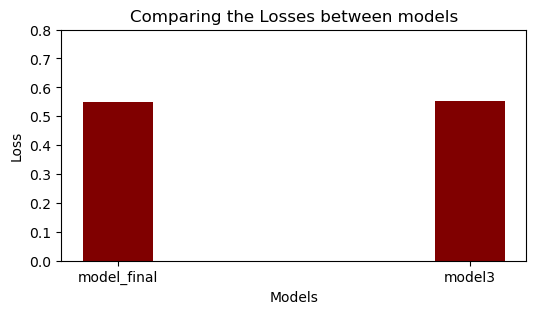

In [343]:
#Let's compare the loss between model3(best accuracy but bad recall) and the final_model(best recall):

losses = [score_model_final[0],score_model3[0]]
models = ['model_final', 'model3']

fig = plt.figure(figsize = (6,3))

plt.bar(models, losses, color ='maroon',
        width = 0.2, align = 'center')
plt.ylim(0, 0.8)
plt.ylabel('Loss')
plt.xlabel('Models');
plt.title('Comparing the Losses between models')
plt.show()

<h5 style="color:brown;">
As wee see in the figure above, the two models have almost the same loss
</h5>

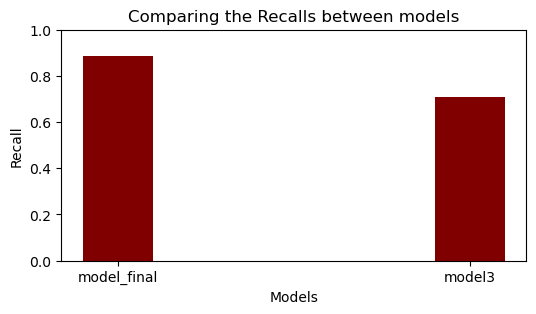

In [344]:
#Let's compare the recall between model3(best accuracy but bad recall) and the final_model(best recall):

recalls = [score_model_final[1],recall_for_model3]
models = ['model_final', 'model3']

fig = plt.figure(figsize = (6,3))

plt.bar(models, recalls, color ='maroon',
        width = 0.2, align = 'center')
plt.ylim(0, 1)
plt.ylabel('Recall')
plt.xlabel('Models');
plt.title('Comparing the Recalls between models')
plt.show()

<h5 style="color:brown;">
As wee see in the figure above, model_final has better recall than model3.
</h5>

In [368]:
#Let's see a comparisons to the models we've reached:
models = pd.DataFrame({
    'Model': ['classical_model', 'model3', 'model_final'],
    'Score': [score_classical, score_model3[1], 'Nan'],
    'Recall': [recall_classical, recall_for_model3, score_model_final[1]]
                    })

In [369]:
models

,Model,Score,Recall
0,classical_model,0.729223,0.710304
1,model3,0.729928,0.708367
2,model_final,Nan,0.887144


<h1>
Conclusion
</h1>

<h6>
We obtained the cardiovascular disease dataset from kaggle, which consists of 13 features, and 70,000 record.
<br>
<br>
We did some data preparation to prepare the data to various models.
<br>
<br>
Then we trained some classical models such as RandomForest, SVC and XGBClassifier. We used the ensemble learning to do the voting among the classifiers.
<br>
<br>
to see the accuracy that most of the papers have reached, and we obtained the maximum accuracy
reached by the authors of the papers which is 73%.
<br>
<br>    
Then we draw the confusion Matrix to see the recall, which in case of the classical techniques was 71%.
<br>
<br>
Then we trained a keras sequential model, we started with one layer, and it gave us 72%.
<br>
<br>
Then we fined-tune our model by using the grid search to obtain the best parameteres.
<br>
<br>
Finally, we tested the recall of the keras model and it was 70%, so we created a model with the same network but we used the recall as a metric, with threshold 0.3, and it gave us 88% recall.
</h6>